### ANN

In [60]:
import numpy as np

class LogisticRegressionGD:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, max_iters=10000, epsilon=1e-5):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon

        # Initialize weights and biases
        self.theta1 = np.random.rand(hidden_size, input_size + 1)
        self.theta2 = np.random.rand(output_size, hidden_size + 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        # Add bias to input
        a1 = np.insert(X, 0, 1, axis=1)

        # Hidden layer
        z2 = np.dot(a1, self.theta1.T)
        a2 = self.sigmoid(z2)
        a2 = np.insert(a2, 0, 1, axis=1)  # Add bias

        # Output layer
        z3 = np.dot(a2, self.theta2.T)
        a3 = self.sigmoid(z3)

        return a1, z2, a2, z3, a3

    def compute_cost(self, y, a3):
        m = len(y)
        cost = (-1 / m) * np.sum(y * np.log(a3) + (1 - y) * np.log(1 - a3))
        return cost

    def backward_propagation(self, a1, z2, a2, z3, a3, y):
        m = len(y)

        # Output layer
        delta3 = a3 - y
        grad_theta2 = (1 / m) * np.dot(delta3.T, a2)

        # Hidden layer
        delta2 = np.dot(delta3, self.theta2[:, 1:]) * (a2[:, 1:] * (1 - a2[:, 1:]))
        grad_theta1 = (1 / m) * np.dot(delta2.T, a1)

        return grad_theta1, grad_theta2

    def update_parameters(self, grad_theta1, grad_theta2):
        self.theta1 -= self.learning_rate * grad_theta1
        self.theta2 -= self.learning_rate * grad_theta2

    def fit(self, X, y):
        for i in range(self.max_iters):
            # Forward propagation
            a1, z2, a2, z3, a3 = self.forward_propagation(X)

            # Calculate cost
            cost = self.compute_cost(y, a3)

            # Backward propagation
            grad_theta1, grad_theta2 = self.backward_propagation(a1, z2, a2, z3, a3, y)

            # Update parameters
            self.update_parameters(grad_theta1, grad_theta2)

            # Stopping criterion
            if cost < self.epsilon:
                print(f"Converged after {i+1} iterations.")
                break

            # Print cost every 1000 iterations
            if (i + 1) % 1000 == 0:
                print(f"Iteration {i + 1}, Cost: {cost}")

    def predict(self, X):
        _, _, _, _, a3 = self.forward_propagation(X)
        predictions = (a3 >= 0.5).astype(int)
        return predictions


In [48]:
# read in data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Clean Data

In [51]:
# check unique values in each column
for i in range(14):
    print(df[i].unique())

# replace '?' with 0
df = df.replace('?', 0)


[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
[1. 0.]
[1. 4. 3. 2.]
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 29

In [52]:
df.shape

(303, 14)

In [53]:
# show types
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object

In [54]:
# convert object to float64
df = df.apply(pd.to_numeric, errors='coerce')

#### Standardize and Split data

In [57]:
# Split data into features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# standardize data using numpy
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split data into train and test sets using numpy
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_indices = indices[:int(X.shape[0] * 0.8)]
test_indices = indices[int(X.shape[0] * 0.8):]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### Train Model

In [90]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, max_iters=10000, epsilon=1e-5):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.epsilon = epsilon

        # Initialize weights and biases
        self.W1 = np.random.randn(hidden_size, input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size)
        self.b2 = np.zeros((output_size, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        # Hidden layer
        Z1 = np.dot(self.W1, X.T) + self.b1
        A1 = self.sigmoid(Z1)

        # Output layer
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = self.sigmoid(Z2)

        return A1, A2

    def compute_cost(self, y, A2):
        m = y.shape[0]
        cost = (-1 / m) * np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2))
        return cost

    def backward_propagation(self, X, y, A1, A2):
        m = y.shape[0]

        # Output layer
        dZ2 = A2 - y.T
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

        # Hidden layer
        dZ1 = np.dot(self.W2.T, dZ2) * A1 * (1 - A1)
        dW1 = (1 / m) * np.dot(dZ1, X)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def fit(self, X, y):
        for i in range(self.max_iters):
            # Forward propagation
            A1, A2 = self.forward_propagation(X)

            # Calculate cost
            cost = self.compute_cost(y, A2)

            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, y, A1, A2)

            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2)

            # Stopping criterion
            if cost < self.epsilon:
                print(f"Converged after {i+1} iterations.")
                break

            # Print cost every 1000 iterations
            if (i + 1) % 1000 == 0:
                print(f"Iteration {i + 1}, Cost: {cost}")

    def predict(self, X):
        _, A2 = self.forward_propagation(X)
        predictions = (A2 >= 0.5).astype(int)
        return predictions


In [91]:
# fit model
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=4, output_size=1, learning_rate=0.001, max_iters=100000)
nn.fit(X_train, y_train)

Iteration 1000, Cost: 0.42391885303793164
Iteration 2000, Cost: 0.2455833373653482
Iteration 3000, Cost: 0.1010080148558614
Converged after 3754 iterations.


In [92]:
# predict
y_pred = nn.predict(X_test)

In [93]:
# find accuracy using numpy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.13114754098360656


#### Fine Tune

In [114]:
# refit the data but increase the number of hidden units
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=200, output_size=1, learning_rate=0.001, max_iters=100000)
nn.fit(X_train, y_train)

# predict
y_pred = nn.predict(X_test)

# find accuracy using numpy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy}")

Converged after 229 iterations.
Accuracy: 0.22950819672131148


In [116]:
# loop through different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
for learning_rate in learning_rates:
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=25, output_size=1, learning_rate=learning_rate, max_iters=100000)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Learning rate: {learning_rate}, Accuracy: {accuracy}")

Iteration 1000, Cost: 2.6426594735041613
Iteration 2000, Cost: 2.4564273930450917
Iteration 3000, Cost: 2.281153613316673
Iteration 4000, Cost: 2.1157656559714035
Iteration 5000, Cost: 1.9592012125483982
Iteration 6000, Cost: 1.8104479507904985
Iteration 7000, Cost: 1.6685713841099898
Iteration 8000, Cost: 1.5327305922848802
Iteration 9000, Cost: 1.4021841606467083
Iteration 10000, Cost: 1.2762893181125652
Iteration 11000, Cost: 1.1544966761928517
Iteration 12000, Cost: 1.0363422837128178
Iteration 13000, Cost: 0.9214382687511926
Iteration 14000, Cost: 0.8094630291270379
Iteration 15000, Cost: 0.7001516392506197
Iteration 16000, Cost: 0.5932868606554981
Iteration 17000, Cost: 0.488690917609373
Iteration 18000, Cost: 0.3862180542925809
Iteration 19000, Cost: 0.2857478244877357
Iteration 20000, Cost: 0.18717905865603773
Iteration 21000, Cost: 0.09042448056072816
Converged after 21952 iterations.
Learning rate: 0.0001, Accuracy: 0.13114754098360656
Converged after 450 iterations.
Learning

In [117]:
# fit X times and take average accuracy
num_fits = 10
accuracy = []
for i in range(num_fits):
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=25, output_size=1, learning_rate=0.001, max_iters=100000)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    accuracy.append(np.mean(y_pred == y_test))
print(f"Average accuracy: {np.mean(accuracy)}")

Converged after 642 iterations.
Iteration 1000, Cost: 0.38614242288232997
Converged after 1351 iterations.
Converged after 553 iterations.
Converged after 1 iterations.
Converged after 666 iterations.
Converged after 592 iterations.
Converged after 987 iterations.
Converged after 732 iterations.
Converged after 338 iterations.
Converged after 636 iterations.
Average accuracy: 0.2737704918032787


#### Plot Visuals

Converged after 173 iterations.
Converged after 102 iterations.
Converged after 211 iterations.
Converged after 126 iterations.
Converged after 268 iterations.
Converged after 319 iterations.
Converged after 892 iterations.
Converged after 194 iterations.
Converged after 92 iterations.
Converged after 217 iterations.
Converged after 192 iterations.
Converged after 401 iterations.
Converged after 183 iterations.
Converged after 608 iterations.
Converged after 120 iterations.
Converged after 382 iterations.
Converged after 97 iterations.
Converged after 210 iterations.
Converged after 160 iterations.
Converged after 355 iterations.
Converged after 454 iterations.
Converged after 217 iterations.
Converged after 291 iterations.
Converged after 205 iterations.
Converged after 145 iterations.
Converged after 78 iterations.
Converged after 708 iterations.
Converged after 122 iterations.
Converged after 589 iterations.
Converged after 270 iterations.
Converged after 248 iterations.
Converged a

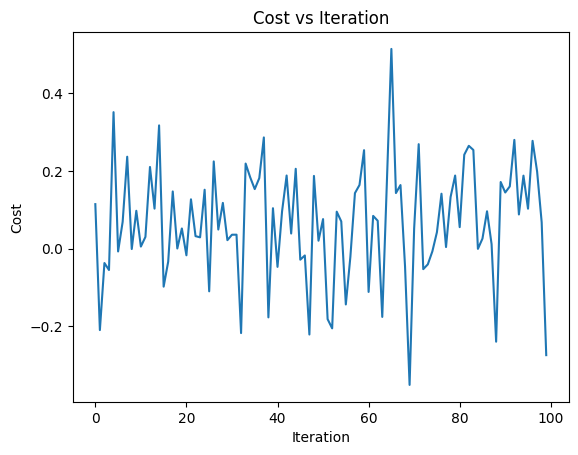

In [95]:
# compute costs
costs = []
for i in range(100):
    nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=4, output_size=1, learning_rate=0.01, max_iters=100000)
    nn.fit(X_train, y_train)
    costs.append(nn.compute_cost(y_test, nn.forward_propagation(X_test)[1]))

# plot costs
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()


In [118]:
# plot the learning curve
def learning_curve(X_train, y_train, X_test, y_test, num_iterations):
    train_costs = []
    test_costs = []
    for i in range(num_iterations):
        nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=4, output_size=1, learning_rate=0.01, max_iters=100000)
        nn.fit(X_train, y_train)
        train_costs.append(nn.compute_cost(y_train, nn.forward_propagation(X_train)[1]))
        test_costs.append(nn.compute_cost(y_test, nn.forward_propagation(X_test)[1]))

    plt.plot(train_costs, label='Train')
    plt.plot(test_costs, label='Test')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

Converged after 474 iterations.
Converged after 388 iterations.
Converged after 107 iterations.
Converged after 60 iterations.
Converged after 291 iterations.
Converged after 267 iterations.
Converged after 184 iterations.
Converged after 170 iterations.
Converged after 722 iterations.
Converged after 212 iterations.
Converged after 476 iterations.
Iteration 1000, Cost: 0.1816768247137696
Converged after 1405 iterations.
Converged after 222 iterations.
Converged after 210 iterations.
Converged after 83 iterations.
Converged after 382 iterations.
Converged after 341 iterations.
Converged after 574 iterations.
Converged after 241 iterations.
Converged after 110 iterations.
Converged after 222 iterations.
Converged after 78 iterations.
Converged after 160 iterations.
Converged after 343 iterations.
Converged after 229 iterations.
Converged after 215 iterations.
Converged after 343 iterations.
Converged after 116 iterations.
Converged after 156 iterations.
Converged after 197 iterations.
C

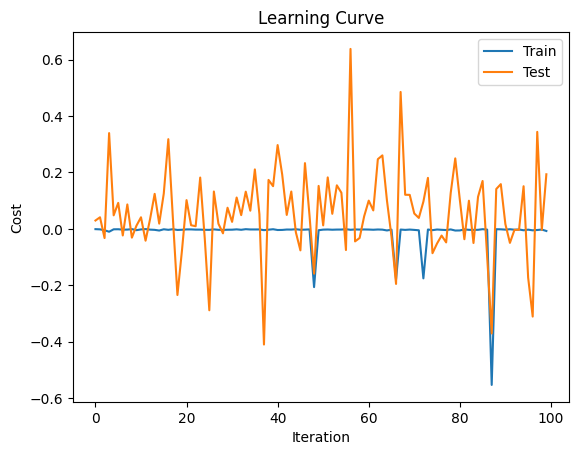

In [119]:
# plot learning curve
learning_curve(X_train, y_train, X_test, y_test, 100)